# Set up your notebook

In [1]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

In [2]:
# import libraries
# set up plot configurations (if required)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, dummy
from sklearn import linear_model, tree, ensemble, neighbors, cluster
from sklearn import model_selection, metrics

import matplotlib
%matplotlib inline

from IPython.display import Image
import pydotplus
import graphviz as gv

In [3]:
plt.rcParams["figure.figsize"] = [8,8]

# Executive Summary

Using information of passengers on board Titanic and the survivors, I start with carrying out visual and basic statistical analysis to understand the relationships of different information available in the dataset. In doing so, we identify with intuition the importance that different factors contribute towards the passenger surviving the accident or not.

Using machine learning models, I then predict if a passenger may survive if similar accidents is to occur. Based on coefficients in the model, insight is gained on which factors are more important. The models are scored against various metrics, including accuracy, precision, recall, f1 score, and the ROC curve.

Finally, I explore if the missing pieces of information can be imputed and whether such imputation is of help in generating a better model.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.


Based on information of passengers on board Titanic and the survivors, we create a model to predict if a passenger will survive a similar shipping incident given the circumstances at the time. In doing so, we identify the key factors that determine if the passengers survive / did not survive the accident.


## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

The Titanic dataset contains information on passengers who boarded the ship from 3 different ports of embarkation. It mentions if the passenger has survived, and provides information on the passenger's name, age, passenger class, ticket fare, cabin, number of siblings / sposes / parents / children on board ship, and the passenger's port of embarkation.

| Column | Description   | Key  |
|------|------|------|
|   survived  | survival | 1 = yes, 0 = no | 
|   pclass  | passenger class, a proxy for socio-economic status | 1 = upper class, 2 = middle class, 3 = lower class | 
|   name  | last name, title first name |
|   sex  | gender | male, female |
|   age | years |
|   sibsp  | number of siblings (brother, sister) or spouses (husband, wife) who also boarded ship |
|   parch  | number of parents or children who also boarded ship |
|   ticket | ticket number |
|   fare  | amount paid for trip (British pound) |
|   cabin  | cabin of passenger |
|   embark  | port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | 

## Risks and Assumptions

Assumption:
- Information of the passengers is complete and reliable


Risks:
- Not all passengers are included in the dataset
- Data may not be representative of all passengers on board the vessel (total of 1,317 passengers, see: http://www.titanicfacts.net/titanic-passengers.html)
- there are missing data
- there are inconsistent entries
- Passengers may be travelling as a group, but not all information on family relations are available (see: https://www.kaggle.com/c/titanic/data)


## Hypothesis

Null hypothesis, $H_0$: There is no correlation between survival rate, and the passenger's circumstances on board the ship (be it passenger class, gender, family size).

Alternative hypothesis, $H_1$: Some passengers are more likely than others to survive. Passengers who survived the Titanic incident are more likely to come from Passenger Class 1, or are women, or travelling with family members.

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

Exploratory data analysis is performed to verify the quality of the data.

In [4]:
#Read data from source 
titanic = pd.read_csv("assets/titanic.csv")
print titanic.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# shape of the dataset
titanic.shape

(891, 12)

there are 891 unique passenger information, with 12 columns of information for each passenger

In [6]:
# info on the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Columns that have missing data: Age (only 714 out of 891), Cabin (only 204 out of 891), and Embarked (only 889 out of 891)

In [7]:
# statistical summary
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
cat = titanic.dtypes[titanic.dtypes == "object"].index
titanic[cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


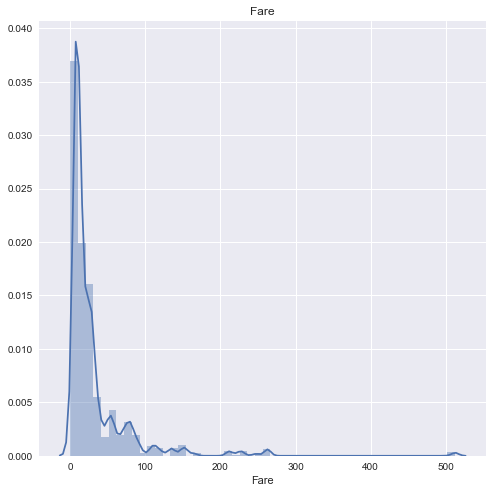

In [9]:
# interesting that fare starts from 0, and has very distinct outlier
sns.distplot(titanic["Fare"]);
plt.title("Fare");

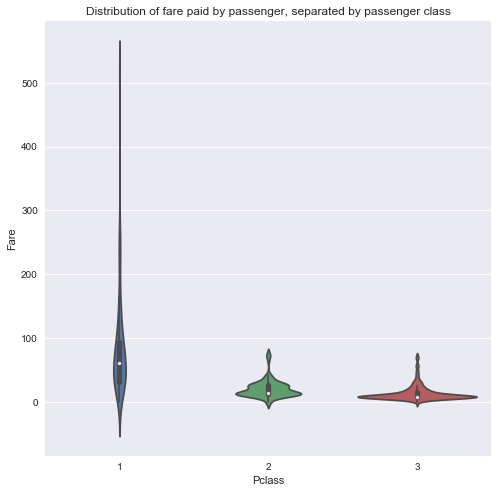

In [10]:
# distribution of fare paid, based on passenger class
sns.violinplot(y="Fare", x="Pclass", data=titanic);
plt.title("Distribution of fare paid by passenger, separated by passenger class");

In [11]:
#Overall chance of survival
titanic['Survived'].mean()

0.3838383838383838

The overall survival rate is 0.38

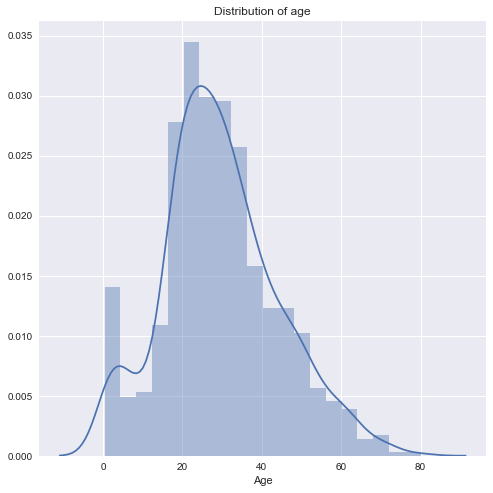

In [12]:
# distribution of age across the passengers
sns.distplot(titanic["Age"].dropna());
plt.title("Distribution of age");

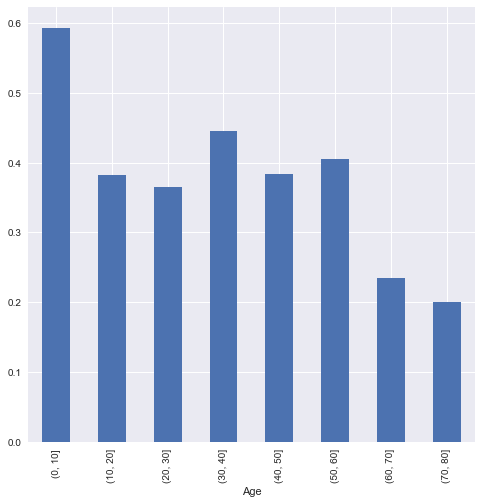

In [13]:
# grouping passengers by age. pandas' cut is used here to convert continuous variabl into categorical variable
group_age = pd.cut(titanic["Age"], np.arange(0, 90, 10))
passenger_agegroup = titanic.groupby(group_age).mean()
passenger_agegroup['Survived'].plot.bar()

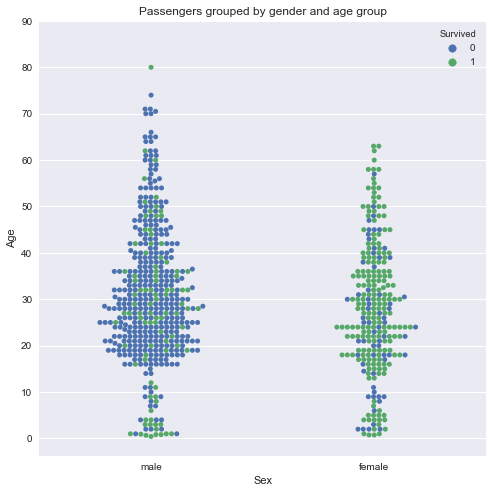

In [14]:
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=titanic);
plt.title('Passengers grouped by gender and age group');
plt.yticks(np.arange(0,100,10));

Children age 10 and below were the passengers most likely to survive (likely with their mothers or women caretakers). Even then, survival rate for this age group was less than 60%. The next highest age group is 30-40 years, which may be the parents' age group. Most of the women in this dataset survived, compared to the men.

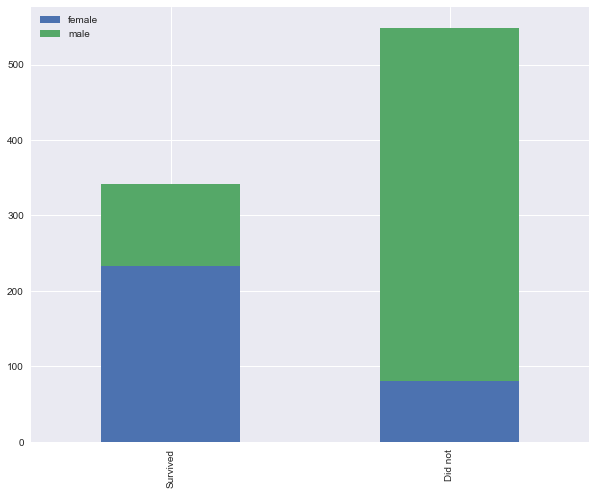

In [15]:
# survival rate - gender difference
Survived_Gender = titanic[titanic['Survived']==1]['Sex'].value_counts()
DidNot_Gender = titanic[titanic['Survived']==0]['Sex'].value_counts()
Gender = pd.DataFrame([Survived_Gender,DidNot_Gender])
Gender.index = ['Survived','Did not']
Gender.plot(kind='bar', stacked=True, figsize=(10,8))

A majority of those who survived were women. In comparison, a larger majority of those who did not were men 

In [16]:
# grouping passengers by passenger class and gender
passenger_class_gender = titanic.groupby(['Pclass','Sex']).mean()
passenger_class_gender

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

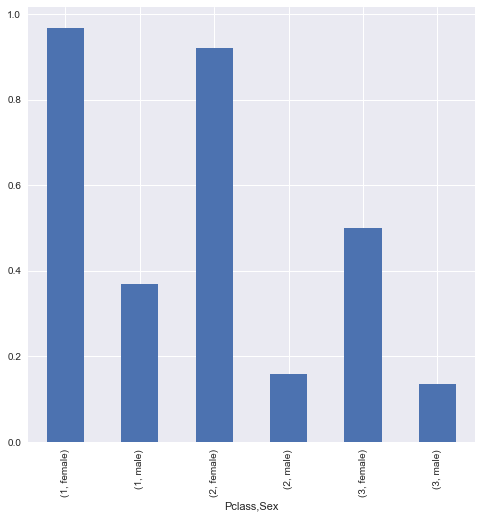

In [17]:
# do people who stay in a upper class have higher survival rate? and is there a gender difference?
passenger_class_gender['Survived'].plot.bar()

Survival rate for women was higher than that of men, for all 3 passenger classes. For women, survival rate for passenger class 1 and 2 were more than 90%. for both genders, the rate of survival drops from class 1 to class 3.

In [18]:
sorted(titanic["Name"])[0:20]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton',
 'Allen, Mr. William Henry',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Allum, Mr. Owen George']

In [19]:
titanic["Name"].describe()

count                           891
unique                          891
top       Graham, Mr. George Edward
freq                              1
Name: Name, dtype: object

Since number of names is 891 and number of Passengers is 891, the names in the dataset are unique. It is thus, not needed to keep PassengerID. Married women have their maiden names listed with brackets. The last name might be useful to identify passengers travelling with family. 

In [20]:
titanic["Ticket"][0:20]  

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [21]:
titanic["Ticket"].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

There are 681 unique tickets. Categorical variables with many levels are not generally not useful for prediction. While it may be possible to group the tickets, it is not easy to understand how the ticketing was carried out. So this column can be removed.

In [22]:
titanic["Cabin"][0:10]  

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [23]:
titanic["Cabin"].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [24]:
# checking out the unique cabins
titanic["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

Of the 891 rows in the dataset, only 204 had information on the Cabin. There are 145 unique cabin values. The Cabin names seem to follow a certain structure (capital letter and then a number) which may be useful. It might be possible that the letter indicates the deck level on which the passenger is staying at. The deck information might be useful to keep for predictive modelling, if there are sufficient information available for training and testing.

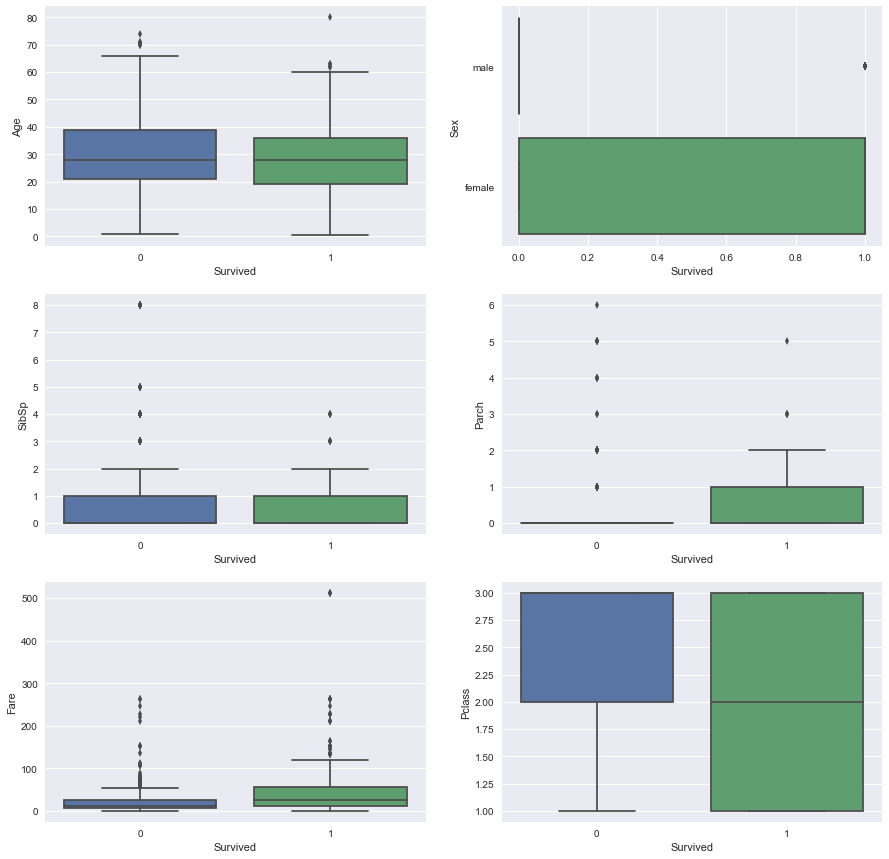

In [25]:
# with Survived as the target variable, we look at the spread of data to identify outliers.
fig, ax = plt.subplots(3,2, figsize=(15,15))
sns.boxplot(x="Survived", y="Age", data=titanic, ax=ax[0,0])
sns.boxplot(x="Survived", y="Sex", data=titanic, ax=ax[0,1])
sns.boxplot(x="Survived", y="SibSp", data=titanic, ax=ax[1,0])
sns.boxplot(x="Survived", y="Parch", data=titanic, ax=ax[1,1])
sns.boxplot(x="Survived", y="Fare", data=titanic, ax=ax[2,0])
sns.boxplot(x="Survived", y="Pclass", data=titanic, ax=ax[2,1])

The box plots give a visual indication of the median, range and outliers. For the passengers who survived, more than 50% had at least 1 family member with them. For the "Fare" column, there seems to be one or more individuals who paid way more than the rest! Individuals who paid more for their ticket appeared to be more likely to have survived.

In [26]:
fare_max_index = np.where(titanic["Fare"] == max(titanic["Fare"]) )
titanic.loc[fare_max_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


3 passengers, it seems, shared the same ticket number and the same ticket fare. it may be the actual fare per person is 3x lower or about 170, which would be in the similar order as the other outliers.

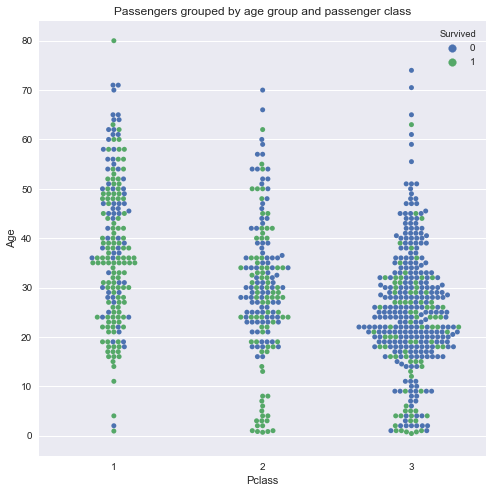

In [27]:
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=titanic);
plt.title('Passengers grouped by age group and passenger class');
plt.yticks(np.arange(0,90,10));

Visually, the swarmplot gives useful information not available in the box plots. More passenger class 1 passengers survived the incident than the second class passengers. The third class passengers have least likelihood of survival.

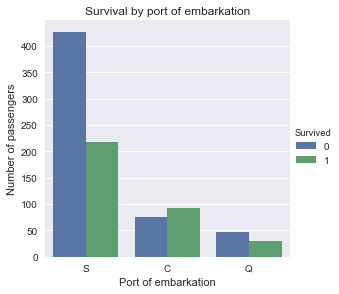

In [28]:
# does port of embarkation matter?
sns.factorplot(x="Embarked", hue="Survived", data=titanic, kind="count");
plt.title('Survival by port of embarkation');
plt.ylabel("Number of passengers");
plt.xlabel("Port of embarkation");

In [29]:
# to see if survivability depends on whether the passenger had boarded Titanic
# r/r.sum allows for percentage to be calculated across row
Embarked_Survived = pd.crosstab(titanic.Embarked, titanic.Survived).apply(lambda r: r/r.sum(), axis=1)
Embarked_Survived

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


The port of embarkation could make a difference in survival rate. This could possibly be due to different cabins / decks assigned at time of embarkation by the passenger.

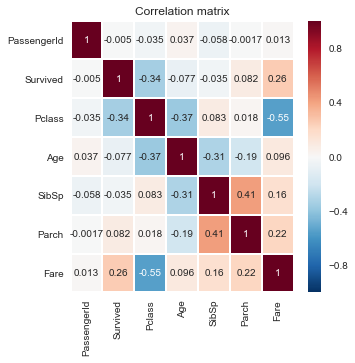

In [30]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(titanic.corr(),linewidths=1.0, ax=ax , annot=True)
ax.set_title('Correlation matrix')

The variables that show stronger correlation are Fare and Pclass and Parch and SibSp.

# Data Cleaning

Data is mined and refined at this stage.

In [31]:
# make a copy before editing data
titanic_clean = titanic.copy()

In [32]:
# extract title and last name of passenger
def get_title(Name):
    start = Name.find(", ") + len(", ")
    end = Name.find(". ") + 1
    return Name[start:end] 

titanic_clean["Title"] = titanic_clean["Name"].apply(lambda x: get_title(x))
titanic_clean["LastName"] = titanic_clean["Name"].apply(lambda x: (x.split(", ")[0]))
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Allen


In [33]:
# drop columns that do not contain useful information for predictive modelling
titanic_clean = titanic_clean.drop(['PassengerId','Name', 'Ticket'], axis=1)
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,LastName
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.,Braund
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.,Cumings
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.,Heikkinen
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.,Futrelle
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.,Allen


In [34]:
# PClass is provided as an integer value. it is not proper to have the information encoded as numeric values
# create dummy variables for model use
pclass_dummy = pd.get_dummies(titanic_clean['Pclass'], prefix='Class')
titanic_clean = titanic_clean.join(pclass_dummy)
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,LastName,Class_1,Class_2,Class_3
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.,Braund,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.,Cumings,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.,Heikkinen,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.,Futrelle,1,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.,Allen,0,0,1


In [35]:
# Sex is provided as categorical values
# create dummy variables for model use
sex_dummy = pd.get_dummies(titanic_clean['Sex'], prefix='Sex')
titanic_clean = titanic_clean.join(sex_dummy)
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,LastName,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.,Braund,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.,Cumings,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.,Heikkinen,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.,Futrelle,1,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.,Allen,0,0,1,0,1


In [36]:
# Extract deck information from Cabin
str_Cabin = titanic_clean["Cabin"].astype(str)
str_Cabin = np.array([Cabin[0] for Cabin in str_Cabin])
str_Cabin = pd.Categorical(str_Cabin)
str_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [37]:
# Extract deck information from Cabin, and rename column to Deck
titanic_clean["Cabin"] = str_Cabin
titanic_clean.rename(columns={'Cabin':'Deck'}, inplace=True)
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Embarked,Title,LastName,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,n,S,Mr.,Braund,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs.,Cumings,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,n,S,Miss.,Heikkinen,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs.,Futrelle,1,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,n,S,Mr.,Allen,0,0,1,0,1


In [38]:
Pclass_Deck = titanic_clean[['Pclass','Deck']]
Pclass_Deck.sort_values(by=['Pclass','Deck'], ascending=[True,True])

,Pclass,Deck
23,1,A
96,1,A
174,1,A
185,1,A
209,1,A
284,1,A
445,1,A
475,1,A
556,1,A
583,1,A


How the PClass matches with the decks make sense. The first class is assigned to decks A-B, third class is on decks E/F/G. It is likely that people at the upper deck will more likely survive as they will be closer to the lifeboats. 

687 out of 891 passengers do not have cabin information available. This includes passengers on first class also. 

As deck level will be highly correlated with PClass, adding Deck to the predictive model will not add much power and may need to overfitting if Pclass or Fare is already added to the model. There is also no guarantee that people were in on the same level as their cabins when the ship hit diaster.

In [39]:
# look at number of missing age information
missing_Age = np.where(titanic_clean["Age"].isnull() == True)
missing_Age

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [40]:
len(missing_Age[0])

177

If a column has only a few missing values, it can make sense to delete records with missing values present. But there are 177 missing information in the Age column, and dropping the relevant information could mean dropping some 20% of potentially useful information. Instead, the missing values could be replaced by a median value, or by estimating values using predictive modelling (impute values).

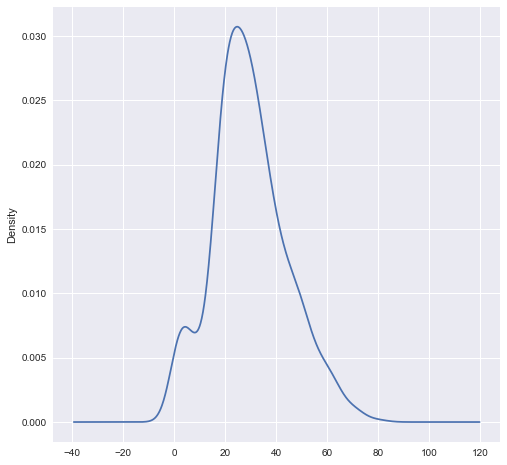

In [41]:
titanic_clean.Age.plot(kind="density")

In [42]:
titanic_clean["Age"].median()

28.0

Based on the histogram above, median ages between 20 and 30 are the most common. It will be reasonable to assume that the missing age value is around the median value of 28.

In [43]:
# where Age is null, replace with median age
new_Age = np.where(titanic_clean["Age"].isnull(), titanic_clean['Age'].dropna().median(), titanic_clean["Age"])
titanic_clean["Age"] = new_Age
titanic_clean["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

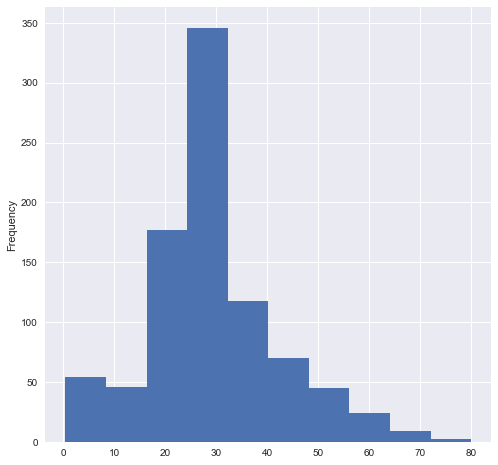

In [44]:
titanic_clean.Age.plot(kind="hist")

Looking at the histogram above, some of the ages that was assigned with the median value may be incorrect, but it will be better than dropping the passenger information from the dataset. It may be better to impute the missing data for age.

In [45]:
# since SibSp and Parch are family members, create a family variable
titanic_clean["Family"] = titanic_clean["SibSp"] + titanic_clean["Parch"]
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Embarked,Title,LastName,Class_1,Class_2,Class_3,Sex_female,Sex_male,Family
0,0,3,male,22.0,1,0,7.2500,n,S,Mr.,Braund,0,0,1,0,1,1
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs.,Cumings,1,0,0,1,0,1
2,1,3,female,26.0,0,0,7.9250,n,S,Miss.,Heikkinen,0,0,1,1,0,0
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs.,Futrelle,1,0,0,1,0,1
4,0,3,male,35.0,0,0,8.0500,n,S,Mr.,Allen,0,0,1,0,1,0


In [46]:
# where Embarked is not provided, replace null with mode
titanic_clean.loc[(titanic_clean['Embarked'].isnull()), 'Embarked'] = titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0])

In [47]:
# Embarked is provided as categorical values
# create dummy variables for model use
Embarked_dummy = pd.get_dummies(titanic_clean['Embarked'], prefix='Embarked')
titanic_clean = titanic_clean.join(Embarked_dummy)
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Embarked,Title,LastName,Class_1,Class_2,Class_3,Sex_female,Sex_male,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,n,S,Mr.,Braund,0,0,1,0,1,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs.,Cumings,1,0,0,1,0,1,1,0,0
2,1,3,female,26.0,0,0,7.9250,n,S,Miss.,Heikkinen,0,0,1,1,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs.,Futrelle,1,0,0,1,0,1,0,0,1
4,0,3,male,35.0,0,0,8.0500,n,S,Mr.,Allen,0,0,1,0,1,0,0,0,1


In [48]:
# For the fare, there are fares with 0 value. Check median price of each Pclass
titanic_clean.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [49]:
# tried to correct fare values that are 0. not able to apply code correctly
# titanic_clean.bool[(titanic_clean['Fare'] == 0 & titanic_clean['Pclass'] == 1), "Fare"] = 60.2875
# titanic_clean.bool[(titanic_clean['Fare'] == 0 & titanic_clean['Pclass'] == 2), "Fare"] = 14.25
# titanic_clean.bool[(titanic_clean['Fare'] == 0 & titanic_clean['Pclass'] == 3), "Fare"] = 8.05

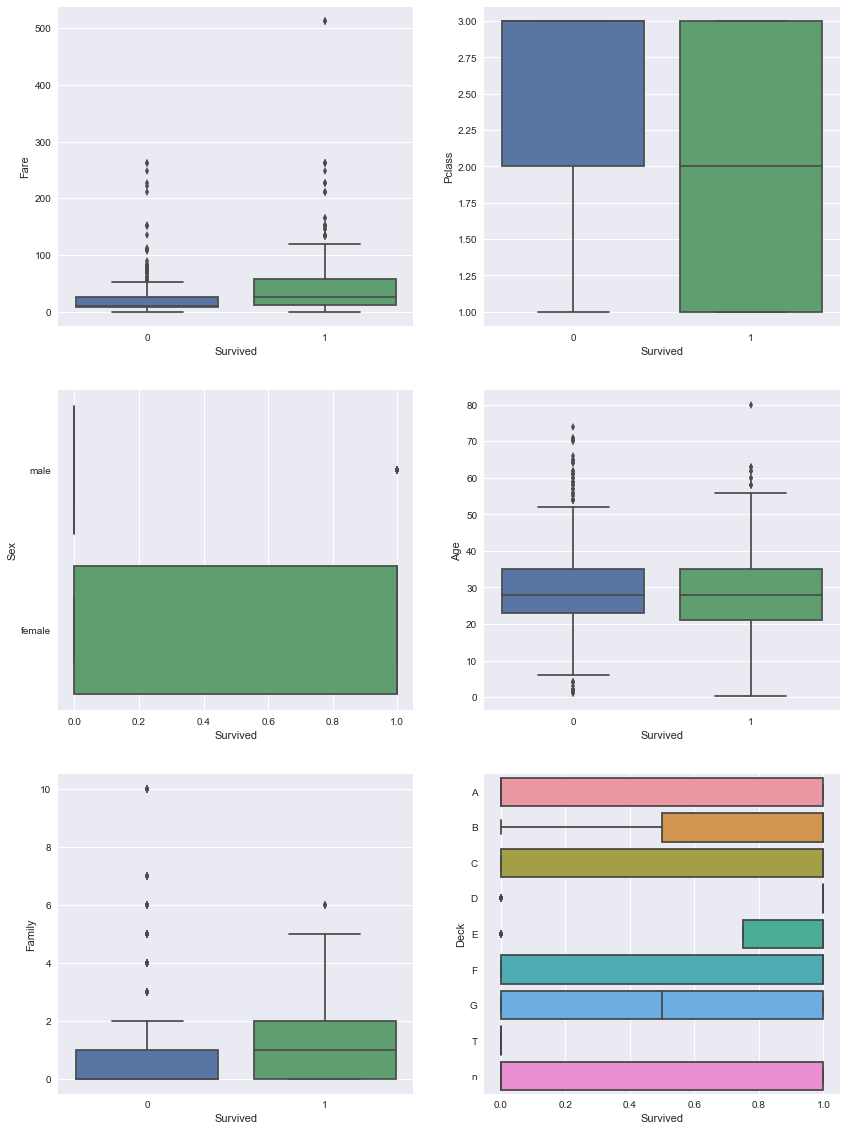

In [50]:
# with Survived as target variable, box plots used to visualise spread of data and outliers.
fig, ax = plt.subplots(3,2, figsize=(14,20))
sns.boxplot(x="Survived", y="Fare", data=titanic_clean, ax=ax[0,0])
sns.boxplot(x="Survived", y="Pclass", data=titanic_clean, ax=ax[0,1])
sns.boxplot(x="Survived", y="Sex", data=titanic_clean, ax=ax[1,0])
sns.boxplot(x="Survived", y="Age", data=titanic_clean, ax=ax[1,1])
sns.boxplot(x="Survived", y="Family", data=titanic_clean, ax=ax[2,0])
sns.boxplot(x="Survived", y="Deck", data=titanic_clean, ax=ax[2,1])

In [51]:
# calculate coefficient of correlation between factors
titanic_coeff = titanic_clean.corr()
titanic_coeff

,Survived,Pclass,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Family,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.016639,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.885924,-0.188432,0.916673,-0.131900,0.131900,0.065997,-0.243292,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.323896,0.015831,-0.291955,-0.081163,0.081163,-0.245619,0.030248,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,0.890712,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,0.783111,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.217138,0.269335,-0.117216,-0.162184
Class_1,0.285904,-0.885924,0.323896,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,-0.046114,0.296423,-0.155342,-0.161921
Class_2,0.093349,-0.188432,0.015831,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.038594,-0.125416,-0.127301,0.189980
Class_3,-0.322308,0.916673,-0.291955,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,0.071142,-0.153329,0.237449,-0.015104
Sex_female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.200988,0.082853,0.074115,-0.119224


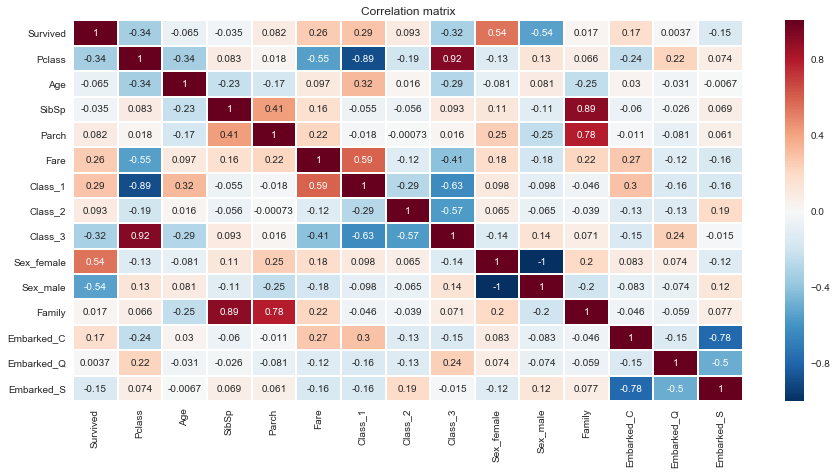

In [52]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(titanic_coeff,linewidths=1.0, ax=ax , annot=True)
ax.set_title('Correlation matrix')

Of the variables, sex_female is most positively correlated with survived, followed by class 1, fare, class 2, parch and family. Strongest negative correlation is sex_male, followed by pclass, class 3, age and then SibSp.

In [53]:
titanic_clean = titanic_clean.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Deck'], axis=1)
titanic_clean.head()

,Survived,Age,Fare,Embarked,Title,LastName,Class_1,Class_2,Class_3,Sex_female,Sex_male,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,S,Mr.,Braund,0,0,1,0,1,1,0,0,1
1,1,38.0,71.2833,C,Mrs.,Cumings,1,0,0,1,0,1,1,0,0
2,1,26.0,7.9250,S,Miss.,Heikkinen,0,0,1,1,0,0,0,0,1
3,1,35.0,53.1000,S,Mrs.,Futrelle,1,0,0,1,0,1,0,0,1
4,0,35.0,8.0500,S,Mr.,Allen,0,0,1,0,1,0,0,0,1


# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

In [54]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived      891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null object
LastName      891 non-null object
Class_1       891 non-null uint8
Class_2       891 non-null uint8
Class_3       891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Family        891 non-null int64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(2), object(3), uint8(8)
memory usage: 55.8+ KB


In [55]:
# establishing X and Y arrays
factors = ["Age", "Class_1", "Class_2", "Class_3", "Sex_female", "Sex_male", "Family", "Embarked_Q", "Embarked_S", "Embarked_C"]
X = titanic_clean[factors].copy()
y = titanic_clean["Survived"].copy()

In [56]:
# Separate X and Y arrays into training and test datasets. 80% used for training, 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2)

In [57]:
scaler = preprocessing.StandardScaler()

In [58]:
# scale only continuous variable for training dataset 
scaler.fit(X_train[["Age"]]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
# transform X_train and X_test dataset
X_train_scaled = X_train.copy()
X_train_scaled["Scaled_age"] = scaler.transform(X_train[["Age"]])
X_train_scaled.drop("Age", axis=1, inplace=True)

X_test_scaled = X_test.copy()
X_test_scaled["Scaled_age"] = scaler.transform(X_test[["Age"]])
X_test_scaled.drop("Age", axis=1, inplace=True)

In [60]:
# as there are a few models to test, some functions are prepared to initialise the model, evaluate model and plot ROC curve

# plot ROC
def plot_roc(name, ytest, y_score):
    fpr, tpr, threshold = metrics.roc_curve(ytest, y_score)
  
    plt.plot(fpr, tpr, label='ROC curve of {} (area = {:0.2f})'.format(name, metrics.roc_auc_score(ytest,y_score)));
    plt.ylabel('True Positive Rate aka Sensitivity')
    plt.xlabel('False Positive Rate aka Specificity')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    
# initialise model
def fit_model(model, xtrain, ytrain):
    model.fit(xtrain,ytrain)
    return model
   

# evaluate model    
def evaluate_model(model, name, xtrain=X_train_scaled, xtest=X_test_scaled, ytrain=y_train, ytest=y_test):
    model = fit_model(model, xtrain, ytrain)
    y_pred = model.predict(xtest)
    y_score = model.predict_proba(xtest)[:,1]
    plot_roc(name, ytest, y_score);
    plt.legend();
    
    print ("------------------------------------------------")
    print ("Accuracy of {} model: {}".format(name, metrics.accuracy_score(ytest, y_pred)))
    
    print ("Classification report for {} model".format(name))
    print (metrics.classification_report(y_test, y_pred, target_names=['Did_not_survive', 'Survived']))
    
    print ("Confusion matrix for {} model".format(name))
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(conf_matrix, index=['Did_not_survive', 'Survived'], columns=['Did_not_survive', 'Survived'])
    print conf_matrix

------------------------------------------------
Accuracy of KNN model: 0.821229050279
Classification report for KNN model
                 precision    recall  f1-score   support

Did_not_survive       0.82      0.91      0.86       110
       Survived       0.82      0.68      0.75        69

    avg / total       0.82      0.82      0.82       179

Confusion matrix for KNN model
                 Did_not_survive  Survived
Did_not_survive              100        10
Survived                      22        47
------------------------------------------------
Accuracy of Logistic Regression cv5 model: 0.804469273743
Classification report for Logistic Regression cv5 model
                 precision    recall  f1-score   support

Did_not_survive       0.81      0.89      0.85       110
       Survived       0.79      0.67      0.72        69

    avg / total       0.80      0.80      0.80       179

Confusion matrix for Logistic Regression cv5 model
                 Did_not_survive  Survive

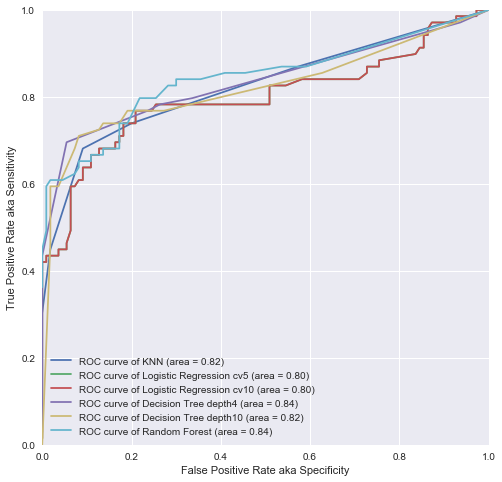

In [61]:
# Evaluate K nearest neighbors model
evaluate_model(neighbors.KNeighborsClassifier(), "KNN")

# Evaluate Logistic Regression model, with 5x cross-validation
evaluate_model(linear_model.LogisticRegressionCV(cv=5), "Logistic Regression cv5") 

# Evaluate Logistic Regression model, with 10x cross-validation
evaluate_model(linear_model.LogisticRegressionCV(cv=10), "Logistic Regression cv10") 

# Evaluate Decision Tree model
evaluate_model(tree.DecisionTreeClassifier(max_depth=4), "Decision Tree depth4")

# Evaluate Decision Tree model
evaluate_model(tree.DecisionTreeClassifier(max_depth=10), "Decision Tree depth10")

# Evaluate Random Forest model
evaluate_model(ensemble.RandomForestClassifier(), "Random Forest")

The metric scoring are similar across the different prediction models. The Logistic Regression model returned the highest area under the curve. Area under the curve tied for KNN, decision tree (depth = 4), and random forest.

The problem statement involved looking at how different factors (e.g. sex, passenger class, age) can affect probability of travel. Coefficients show the impact of a factor on an outcome. Coefficients were not added to the analysis above as K nearest neighbours does not have coefficients as the model assumes all factors have equal weight.


In [62]:
log_Regression = fit_model(linear_model.LogisticRegressionCV(cv=5), X_train, y_train)
decision_t = fit_model(tree.DecisionTreeClassifier(max_depth=4), X_train, y_train)
random_f = fit_model(ensemble.RandomForestClassifier(), X_train, y_train)

In [63]:
# print log regression coefficient of each factor
odds = np.exp(log_Regression.coef_[0])
print (pd.DataFrame([X_train.columns, odds], index=["Factor", "Coef"]))

               0        1        2         3           4         5         6  \
Factor       Age  Class_1  Class_2   Class_3  Sex_female  Sex_male    Family   
Coef    0.962236  2.98842   1.1396  0.293649     3.49155  0.286421  0.844344   

                 7           8           9  
Factor  Embarked_Q  Embarked_S  Embarked_C  
Coef      0.993816    0.708228     1.42084  


In [64]:
# importance of each factor in the decision tree (depth = 4)
print (pd.DataFrame([X_train.columns, decision_t.feature_importances_], index=["Factor", "Importance"])\
.T.sort_values(by="Importance", ascending=True))

       Factor  Importance
4  Sex_female           0
7  Embarked_Q           0
8  Embarked_S           0
2     Class_2  0.00588902
9  Embarked_C  0.00648819
1     Class_1    0.073591
6      Family   0.0891775
0         Age    0.101462
3     Class_3    0.169074
5    Sex_male    0.554319


In [65]:
# importance of each factor in the random forest
print (pd.DataFrame([X_train.columns, random_f.feature_importances_], index=["Factor", "Importance"])\
.T.sort_values(by="Importance", ascending=True))

       Factor  Importance
7  Embarked_Q  0.00579011
8  Embarked_S   0.0140553
2     Class_2   0.0254932
9  Embarked_C    0.027534
1     Class_1   0.0578161
3     Class_3   0.0647606
6      Family    0.112193
4  Sex_female    0.131482
5    Sex_male    0.178463
0         Age    0.382412


# What does your analysis show?

- What are your findings (in relation to your problem statement)?

The models can predict about 80% accuracy on whether a passenger listed in the Titanic dataset provided will survive a similar disaster given their age, sex, passenger class, ship layout etc.

Based on random forest, the most important factors are age and sex (male). Decision tree (depth = 4) which had a slightly higher accuracy score, listed the most important factors as female and passenger class 3.

The odds for survival of a male is only 0.39, which is much lower than that of a female at 2.5. All else being equal, the odds of survival is 0.98 for every increase in age.

Passengers who embarked at Southampton had lower survival rate compared to passengers who embarked in the other locations. 


# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

Earlier on in this notebook, we have imputed Age values by using the median age. The method helped to fill the na cells, but based on the histogram, it may not be the most accurate imputation.

The table provided included information on Mr / Mrs etc. The individual's title may be useful to see if there is a trend in age range.


In [66]:
titanic_impute = titanic_clean.copy()

In [67]:
titanic_impute['Title'].value_counts()

Mr.              517
Miss.            182
Mrs.             125
Master.           40
Dr.                7
Rev.               6
Mlle.              2
Major.             2
Col.               2
Capt.              1
Sir.               1
Jonkheer.          1
Don.               1
the Countess.      1
Ms.                1
Mme.               1
Lady.              1
Name: Title, dtype: int64

Keep the top 5, which happen to be the more generic salutations. Group the rest.

Rev, Major, Col, Jonkheer, Don, Capt, Sir --> Mr |
Mlle, Ms, Lady --> Miss |
Mme, Countess --> Mrs |

See:
https://en.wikipedia.org/wiki/Don_(honorific) |
https://en.wikipedia.org/wiki/Jonkheer

In [68]:
# group the individual titles
def group_salute(t):
    if t in ['Rev', 'Major', 'Col', 'Don', 'Capt', 'Sir']:
        return 'Mr'
    elif t in ['Mlle', 'Ms', 'Lady', 'Jonkheer']:
        return 'Miss'
    elif t in ['Mme', 'Countess']:
        return 'Mrs'
    else:
        return t

In [69]:
titanic_impute['Title_map'] = titanic_impute['Title'].map(group_salute)

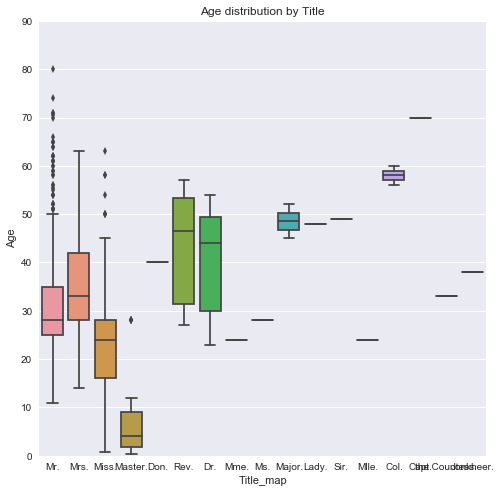

In [70]:
# box plot. Title and age
sns.boxplot(x='Title_map', y='Age', data=titanic_impute);
plt.title('Age distribution by Title');
plt.ylim(0,90);

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)

In [71]:
decisiont_visual = fit_model(tree.DecisionTreeClassifier(max_depth=4), X_train, y_train)

In [73]:
visual_tree = tree.export_graphviz(decisiont_visual, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=["Survived", "Did not Survive"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(visual_tree)  
graph.write_png('visual.png')

InvocationException: GraphViz's executables not found